0) Загрузка данных

In [48]:
import pandas as pd
import numpy as np
import glob
from os.path import basename
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

path = r'/Users/mary/Desktop/Otus/HW2/babynames'  # use your path
all_files = glob.glob(path + "/*.txt")
all_files.sort()

df = pd.DataFrame({'Name': [], 'Sex': [], 'Number': [], 'Year': []})

for filename in all_files:
    year = basename(filename)[3:7]
    df_adding = pd.read_csv(filename, index_col=None, names=['Name', 'Sex', 'Number'])
    df_adding['Year'] = pd.Series(year, index=df_adding.index)

    df = pd.merge(df, df_adding, on=['Name', 'Sex', 'Number', 'Year'], how='outer') 

In [49]:
df.head()

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
Name      1690784 non-null object
Sex       1690784 non-null object
Number    1690784 non-null int64
Year      1690784 non-null object
dtypes: int64(1), object(3)
memory usage: 64.5+ MB


**1) Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов**

In [51]:
df['Year']=pd.to_numeric(df['Year'])
pivot = pd.pivot_table(df, values = ['Number'], index = ['Year'], columns = ['Sex'],aggfunc = np.sum)
pivot.head()

Number        
Sex        F       M
Year                
1880   90993  110493
1881   91955  100748
1882  107851  113687
1883  112322  104632
1884  129021  114445

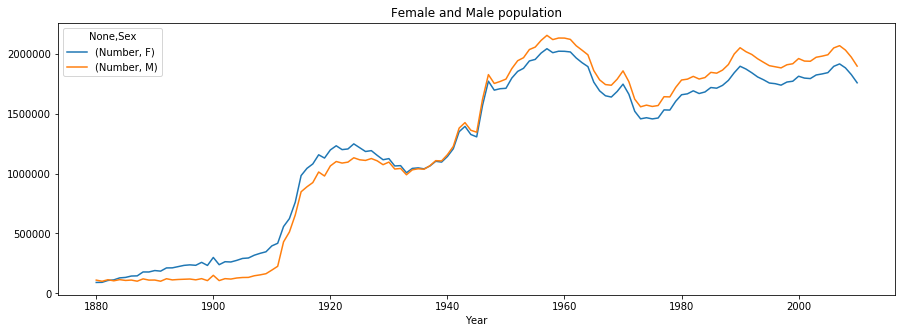

In [52]:
pivot.plot(subplots = False, figsize = (15, 5), rot = 0, sharey = True, legend = True, 
           title = 'Female and Male population')
plt.show()

**2) Найдите самые популярные имена за всю историю**

In [53]:
df.groupby('Name').sum().sort_values('Number', ascending=False).head()

,Number,Year
Name,,
James,5072771,509590
John,5061897,509590
Robert,4788050,509590
Michael,4265373,458467
Mary,4119074,503563


**3) Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время**

In [54]:
print('Группируем по ',(int(df['Year'].max()) - int(df['Year'].min()))/10, 'лет, начиная с ', 
      df['Year'].min(), 'года')

Группируем по  13.0 лет, начиная с  1880 года


In [55]:
df_periods = df
df_periods['Period'] = df_periods['Year']
df_periods['Period'] = pd.to_numeric(df_periods['Period'])

begin = 1880
end = 1893
step = 13
last = 0
for i in range(10):
    if i == 9:
        last = 1
    df_periods.Period[(df_periods.Period >= begin + 13 * i) & (df_periods.Period < end + 13 * i + last)] = i + 1

/Users/mary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [56]:
df_periods.head()

,Name,Sex,Number,Year,Period
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,1
2,Emma,F,2003,1880,1
3,Elizabeth,F,1939,1880,1
4,Minnie,F,1746,1880,1


In [57]:
df_periods[['Period','Sex','Name','Number']].iloc[df_periods.groupby(['Period','Sex'])['Number'].idxmax()]


,Period,Sex,Name,Number
28098,1,F,Mary,13174
942,1,M,John,9655
52266,2,F,Mary,16710
54492,2,M,John,9834
148690,3,F,Mary,67375
154276,3,M,John,56562
180217,4,F,Mary,73980
280074,4,M,Robert,62108
393728,5,F,Mary,66156
399094,5,M,James,80231


Чтобы построить визуализацию для каждого имени прежде всего оставим только уникальные имена

In [58]:
df_names = df_periods[['Name', 'Sex']].iloc[df_periods.groupby(['Period','Sex'])['Number'].idxmax()].drop_duplicates()

df_names

,Name,Sex
28098,Mary,F
942,John,M
280074,Robert,M
399094,James,M
431022,Linda,F
633320,Lisa,F
556106,Michael,M
726529,Jennifer,F
1001663,Jessica,F
1303632,Emily,F


Важно отметить, что обязательно сохранение идентификатора пола, потому что даже, казалось бы, очевидо женское (или очевидно мужское) имя могут по факту носить оба пола, например:

In [60]:
df[['Year', 'Number','Name', 'Sex']][(df.Name == 'Lisa') & (df.Year == 1958)]

,Year,Number,Name,Sex
549101,1958,20206,Lisa,F
557394,1958,36,Lisa,M


С учетом имени и пола выведем графики:

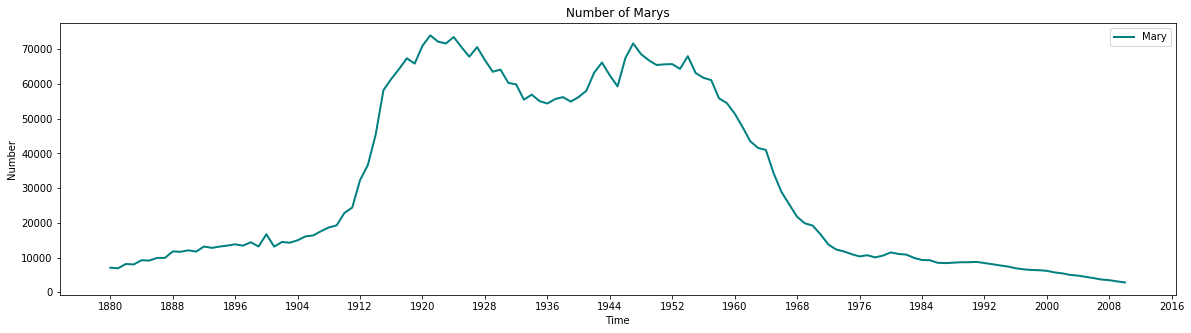

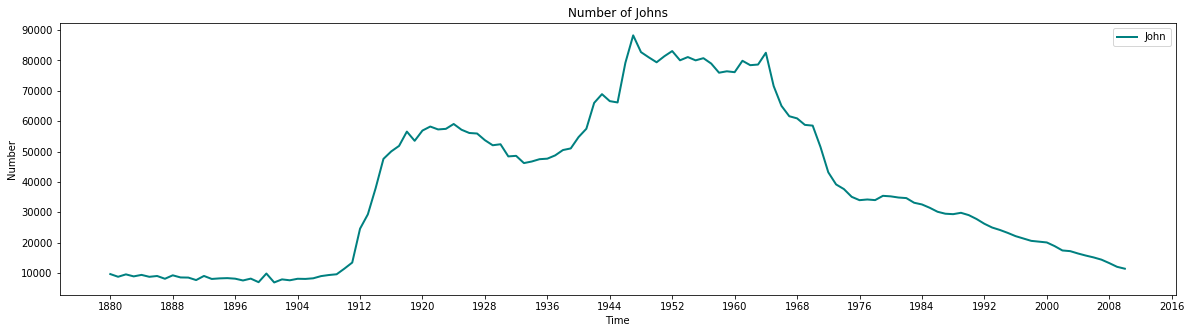

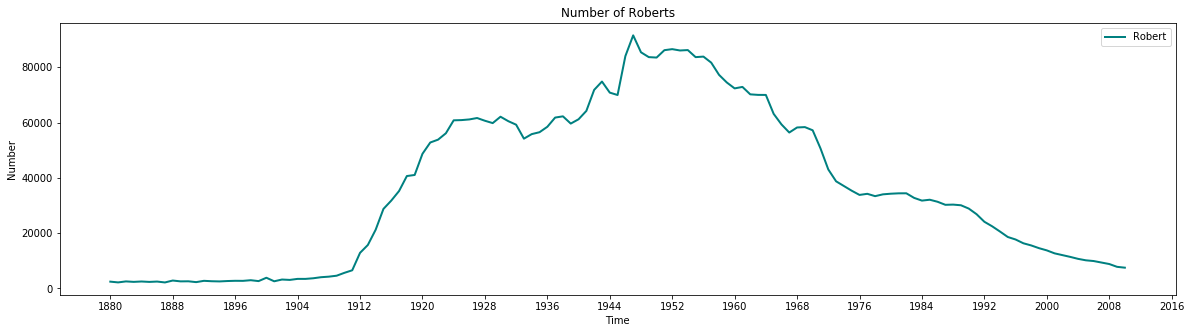

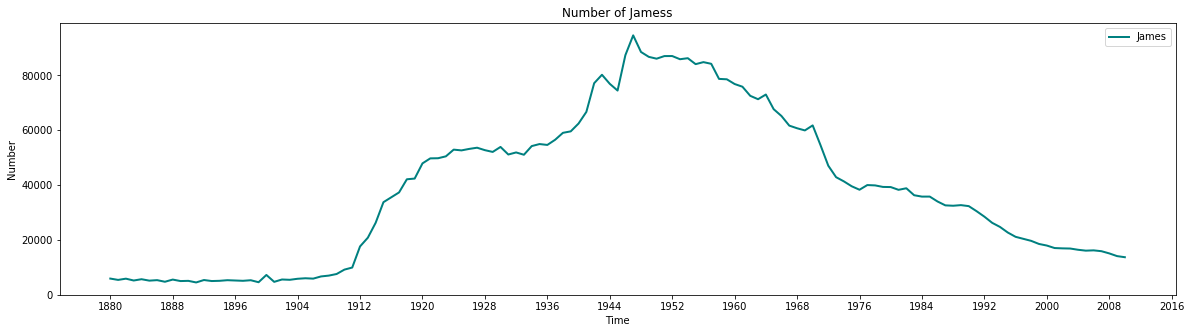

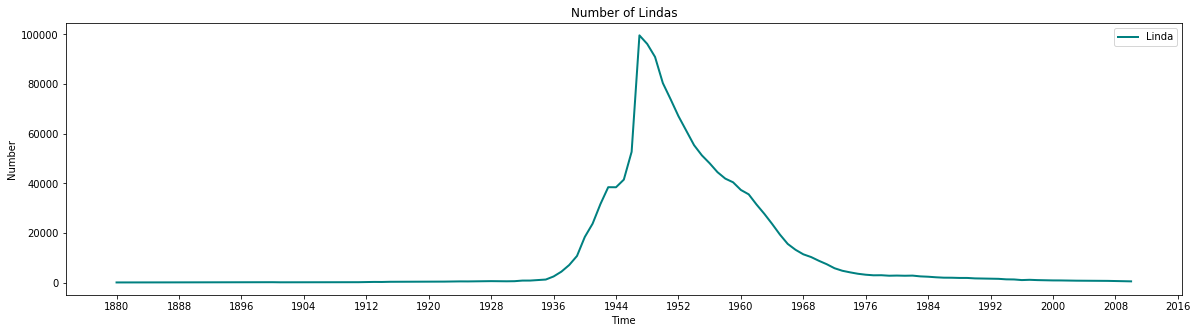

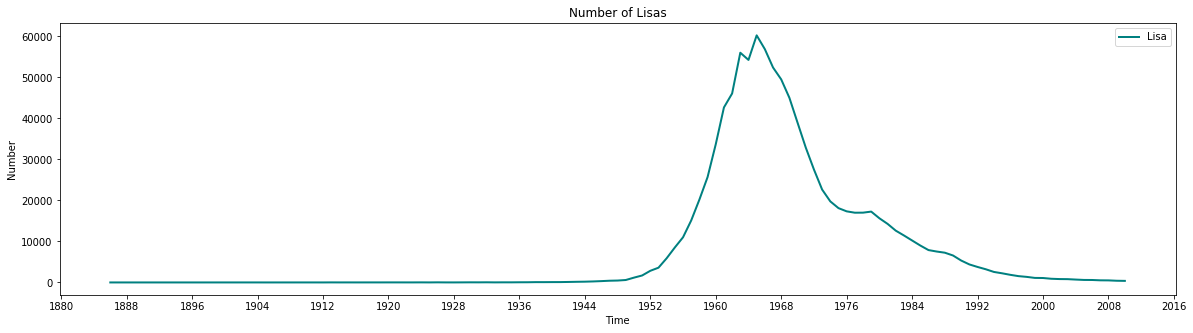

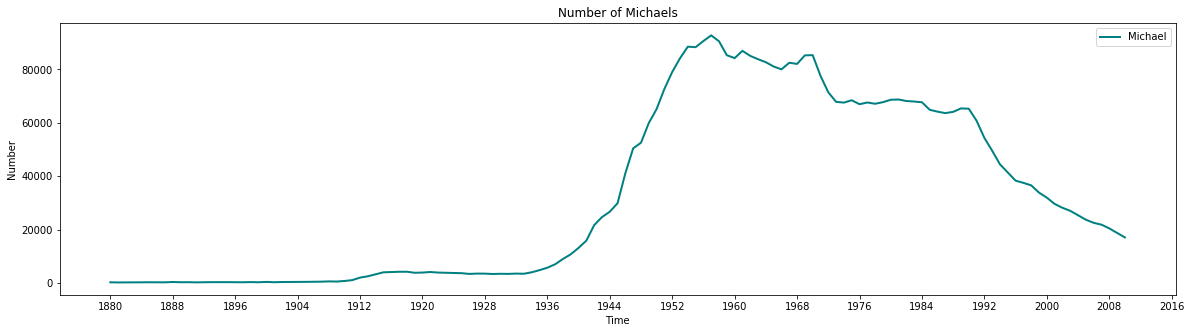

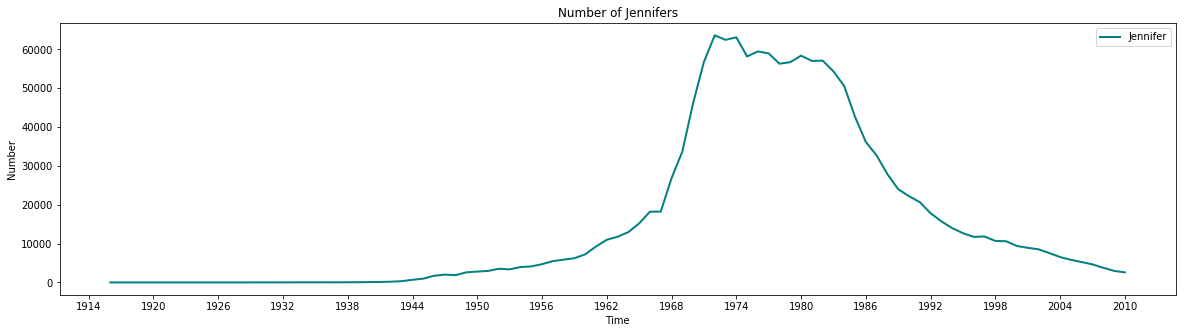

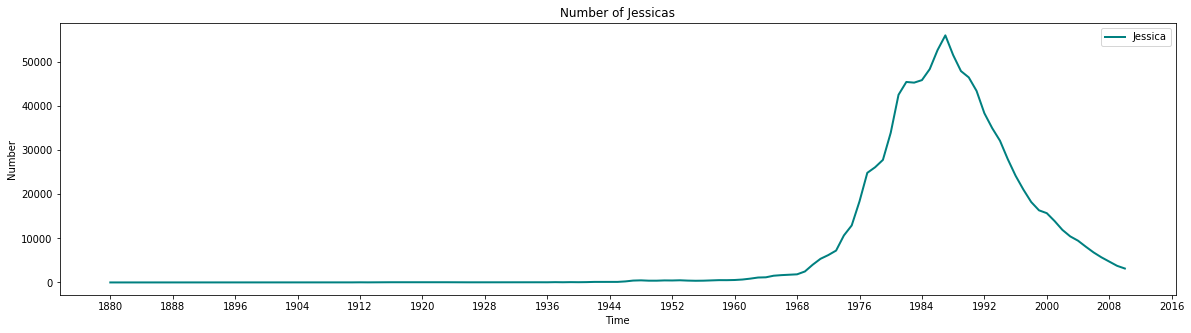

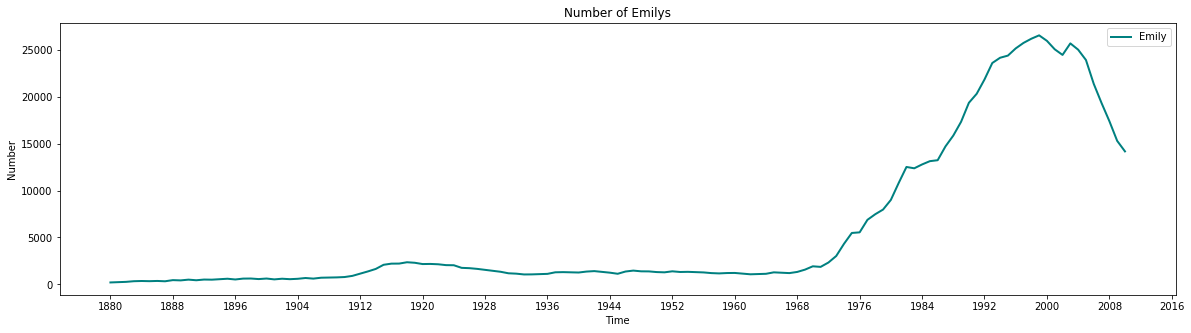

In [61]:
for [ind, name] in df_names.iterrows():
    df_name = df[['Year', 'Number']][(df.Name == name[0]) & (df.Sex == name[1])].sort_values('Year', ascending = True)

    fig, ax = plt.subplots(1, 1, figsize = (20, 5))
    ax.set_xlabel('Time', fontsize = 10)
    ax.set_ylabel('Number', fontsize = 10)
    ax.set_title('Number of ' + name[0] + 's')
    ax.plot(df_name['Year'], df_name['Number'], '-', linewidth = 2, color = '#008080')
    ax.legend([name[0]])
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))


**4) Для каждого года рассчитайте сколько имен покрывают 50% людей,
визуализируйте (мы увидим разнообразие имен за каждый год)**


In [62]:
df_50 = pd.DataFrame({'Year':[],'Number of names':[]})

for y in df.Year.unique():
    df_num = df[df.Year == y].sort_values('Number', ascending = False)
    num = df_num['Number'].sum()/2
    people_num = 0
    names_num = 0
    while people_num < num:
        people_num = people_num + df_num.iloc[names_num][2]
        names_num += 1
    temp = pd.DataFrame({'Year': [int(y)], 'Number of names': [names_num]})
    df_50 = pd.merge(df_50, temp, on = ['Year', 'Number of names'], how = 'outer')

df_50


,Year,Number of names
0,1880,46
1,1881,48
2,1882,50
3,1883,51
4,1884,54
5,1885,55
6,1886,56
7,1887,57
8,1888,59
9,1889,60


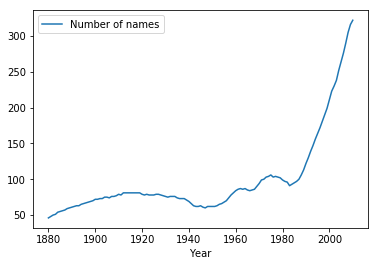

In [63]:
df_50.plot('Year','Number of names')
plt.show()

По графику видно, что с течением времени (особенно после 1980 года) количество имен, покрывающих 50% населения, возрастает. Это значит, что с каждым годом имена людей становятся разнообразнее (реже можно встретить людей с одинаковыми именами, чем раньше).

**5) Выберите 4 года из всего промежутка и отобразите для каждого года
распределение по первой букве в имени, по последней букве в имени**

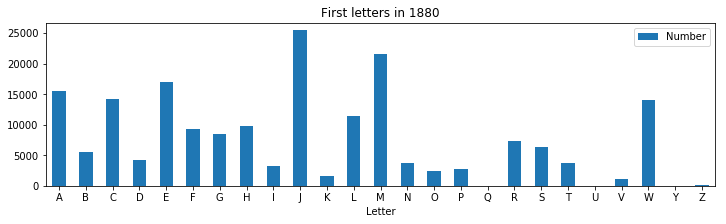

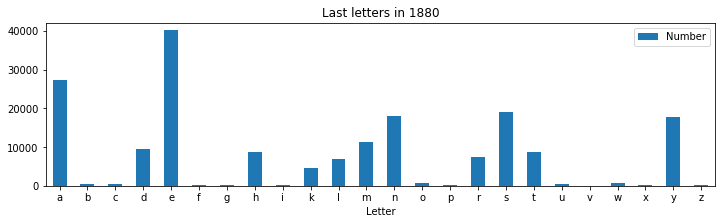

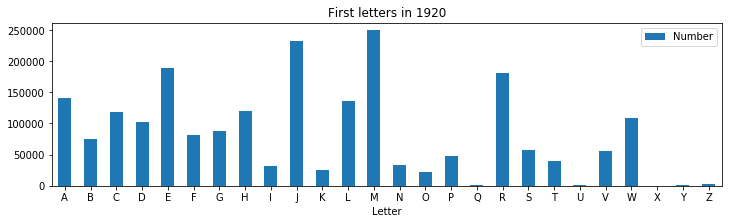

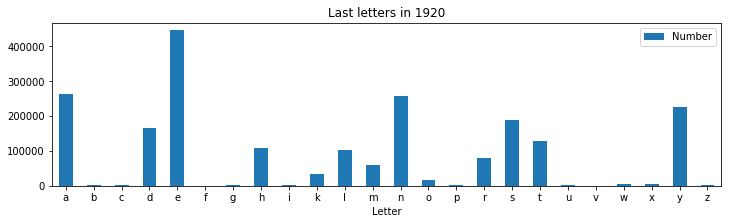

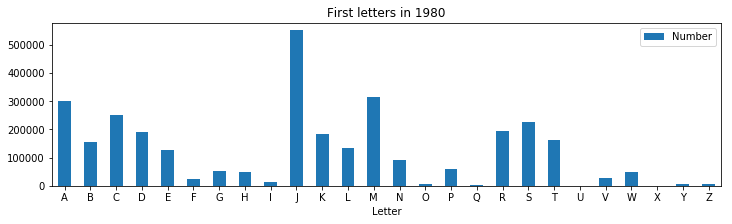

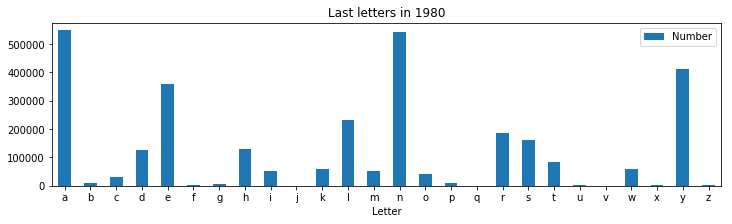

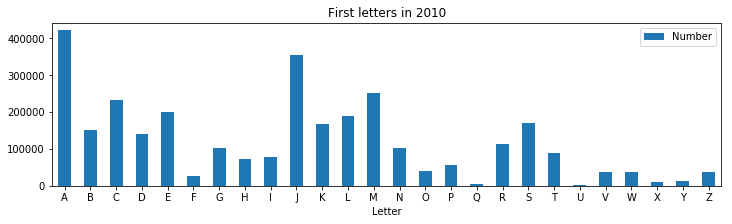

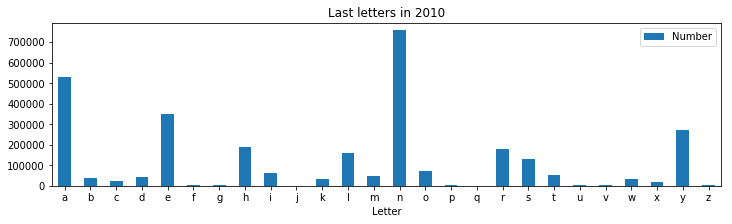

In [65]:
df_first = pd.DataFrame({
    'Letter': [],
    'Number': [],
})

df_last = pd.DataFrame({
    'Letter': [],
    'Number': []
})

for year in [1880, 1920, 1980, 2010]:

    for [ind, row] in df[df['Year'] == year][['Name', 'Number']].iterrows():
        df_temp_first = pd.DataFrame({'Letter': [row[0][0]], 'Number': [row[1]]})
        df_temp_last = pd.DataFrame({'Letter': [row[0][len(row[0]) - 1]], 'Number': [row[1]]})

        df_first = pd.merge(df_first, df_temp_first, on=['Letter', 'Number'], how='outer')
        df_last = pd.merge(df_last, df_temp_last, on=['Letter', 'Number'], how='outer')

    df_first.groupby('Letter').sum().plot(subplots=False, figsize=(12, 3), rot=0, sharey=True, legend=True, kind='bar',
                                          title='First letters in ' + str(year))
    df_last.groupby('Letter').sum().plot(subplots=False, figsize=(12, 3), rot=0, sharey=True, legend=True, kind='bar',
                                         title='Last letters in ' + str(year))

    df_first = df_first.drop(df_first.index[:])
    df_last = df_last.drop(df_last.index[:])

plt.show()

**6) Составьте список из нескольких известных людей (президенты, певцы, актеры,
киногерои) и оцените их влияние на динамику имен, постройте наглядную
визуализацию**

В качестве известных людей были взяты президенты США с 1977 по 2017:

James Earl «Jimmy» Carter 1977—1981

Ronald Wilson Reagan 1981—1989

George Herbert Walker Bush 1989—1993 

William Jefferson «Bill» Clinton 1993—2001

George Walker Bush 2001—2009

Barack Hussein Obama II 2009 — 2017

Сначала создадим датафрейм с именами президентов и годами их президентского срока. Затем нанесем на графики популярность имени президента за все годы (линией) и отдельно выделим промежуток правления (закрашенная область). Для имени George будет 2-е области, поскольку было 2 президента с таким именем.

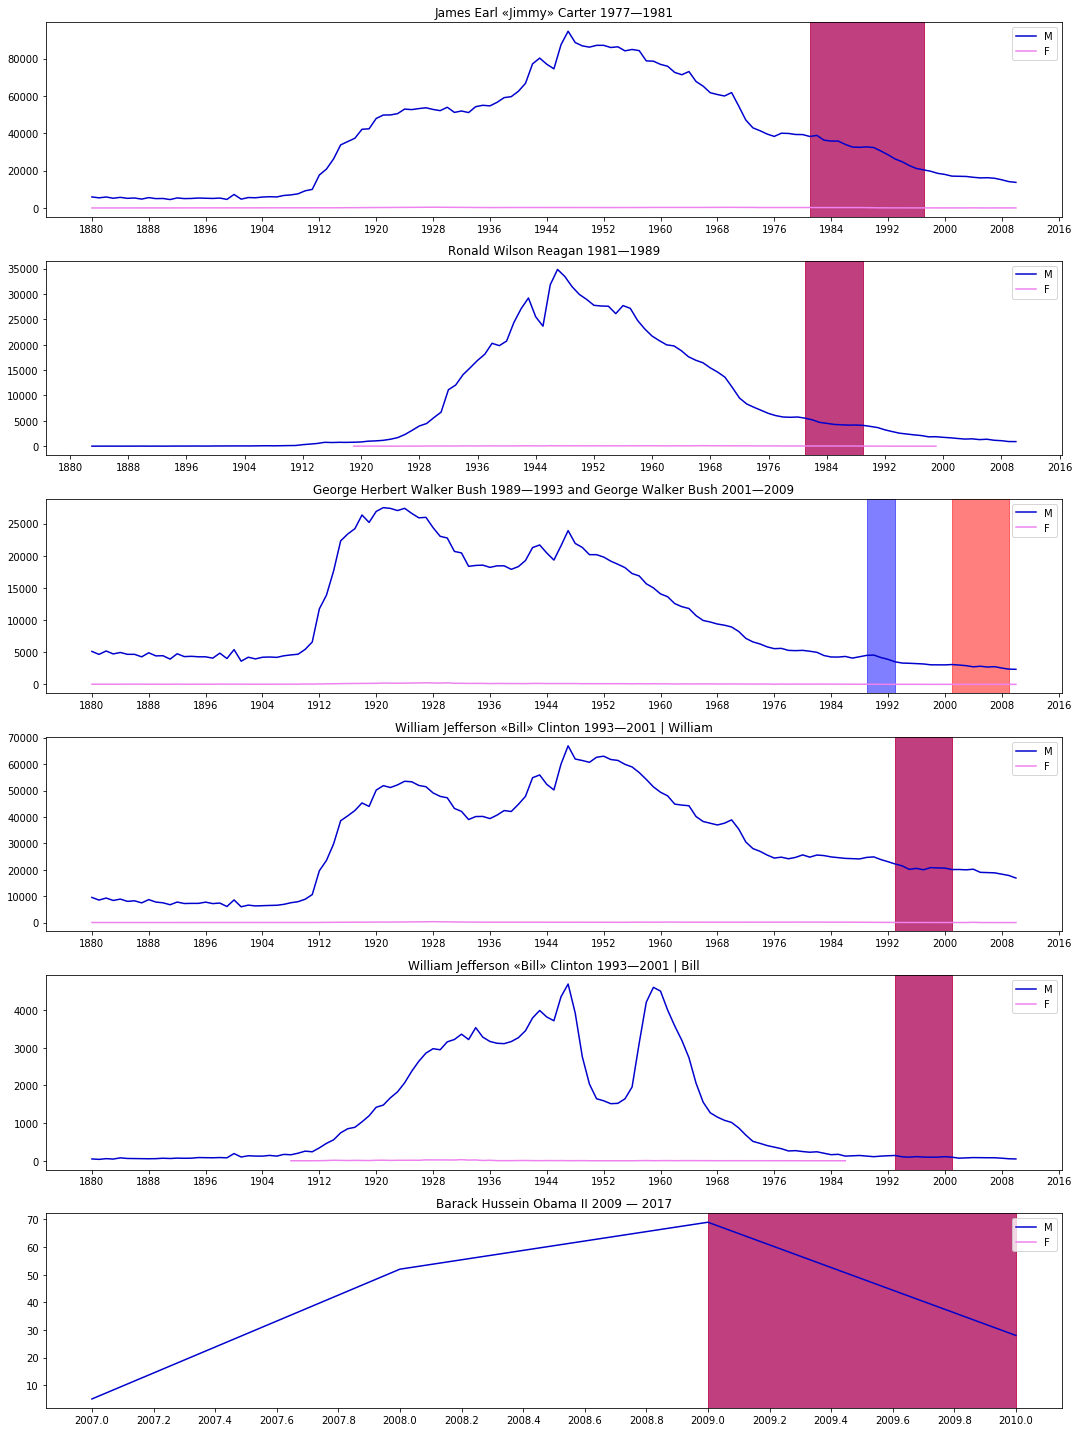

In [74]:
fig, ax = plt.subplots(6, 1, figsize=(15, 20))

ax[0].set_title('James Earl «Jimmy» Carter 1977—1981')
ax[1].set_title('Ronald Wilson Reagan 1981—1989')
ax[2].set_title('George Herbert Walker Bush 1989—1993 and George Walker Bush 2001—2009')
ax[3].set_title('William Jefferson «Bill» Clinton 1993—2001 | William')
ax[4].set_title('William Jefferson «Bill» Clinton 1993—2001 | Bill')
ax[5].set_title('Barack Hussein Obama II 2009 — 2017')

names = np.array(['James', 'Ronald', 'George', 'William', 'Bill', 'Barack'])
year_b = np.array([1997, 1981, 1989, 1993, 1993, 2009])
year_e = np.array([1981, 1989, 1993, 2001, 2001, 2010])
year_b1 = np.array([1997, 1981, 2001, 1993, 1993, 2009])
year_e1 = np.array([1981, 1989, 2009, 2001, 2001, 2010])

df_presidents = pd.DataFrame({
    'Name': names,
    'Y begin': year_b,
    'Y end': year_e,
    'Y begin1': year_b1,
    'Y end1': year_e1,
})

for i in range(6):
    name = df_presidents.iloc[i][0]
    ax[i].plot(df[(df['Name'] == name) & (df['Sex'] == 'M')]['Year'],
               df[(df['Name'] == name) & (df['Sex'] == 'M')]['Number'], label = 'M', color = '#0000CD', ls = '-');
    ax[i].plot(df[(df['Name'] == name) & (df['Sex'] == 'F')]['Year'],
               df[(df['Name'] == name) & (df['Sex'] == 'F')]['Number'], label = 'F', color = '#EE82EE', ls = '-');

    ax[i].axvspan(df_presidents.iloc[i][1], df_presidents.iloc[i][2], alpha=0.5, color='b')
    ax[i].axvspan(df_presidents.iloc[i][3], df_presidents.iloc[i][4], alpha=0.5, color='red')

fig.tight_layout()
for axi in ax.flat:
    axi.legend(loc=1, fontsize=10, frameon=True)
    axi.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.show()

Как видно из графиков, пик популярностей имен был ранее президентских сроков соответствующих правителей. Таким образом, имена президентов в большинстве случаев никак не повлияли на общую динамику имен. Однако стоит выделить имя Барака Обамы, которое в преддверии его президентства начало набирать популярность, а ровно с момента начала правления стало популярность терять, что говорит о возможной зависимости для данного президента. 
